# **Dollars and Sense: Optimizing Bank Marketing Campaigns**

<div style="text-align:center">
    <img src="Images/call_center_banner.png" style="width: 40%; border-radius: 10px;"/>
</div>

## **Table of Contents**
##### *Project Overview*
1. [Introduction](#introduction)
2. [Data](#data)
##### *Data Overview and Cleaning*
3. [Exploratory Data Analysis: Features](#Exploratory-Data-Analysis-Features)
4. [Exploratory Data Analysis: Target](#Exploratory-Data-Analysis-Target)
5. [Exploratory Data Analysis: Summary](#exploratory-data-analysis-summary)
4. [Data Preprocessing](#Data-Preprocessing)
##### *Modeling*
5. [Scoring Functions and Baseline Model](#scoring-functions-and-baseline-model)
6. [Final Modeling](#final-modeling)
##### *Insights and Deployment*
7. [Feature Evaluation](#feature-evaluation)
8. [Model Evaluation](#model-evaluation)
9. [App Development and Deployment](#app-development)
##### *Conclusion*
10. [Conclusion](#conclusion)
##### *Appendix*
11. [Model Iterations](#appendix-model-iterations)
12. [Regularization Attempts and Techniques](#appendix-regularization-techniques)

<a id="introduction"></a>

## **Introduction**

This machine learning project does a deep dive into a bank marketing dataset to understand what featuers are most important to a marketing campaign's success, and then uses that uderstanding to build an optimized model and deploy that model to end users

The project has the following objectives:

1. **Determine feature importance**
    - Find out which features contribute the most to customer acquisition
<br>
</br>
2. **Build an optimized model**
    - To build a model that can predict whether a customer will subscribe to a term deposit or not, and
<br>
</br>
3. **Develop a no code app**
    - To be used my marketing teams to determine the probability an interaction will result in a customer subscribing to a term deposit


<div style="text-align:center">
    <img src="Images/fin_datas.png" style="width: 45%; border-radius: 10px;"/>
</div>

<a id='Data'></a>

## **Data**

##### <ins>*Overview*</ins>

This [dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) is from the UCI Machine Learning Repository and contains data from a Portuguese bank's marketing campaign.

The data was collected from May 2008 to November 2010

High level, dataset includes:

- 45,307 rows, each representing a customer interaction, and
- 21 feature columns, of which:
    - 11 are categorical features (such as customer education), and
    - 10 are numerical features (such as customer age)

The target variable is the "y" column, which indicates whether a customer subscribed to a term deposit or not.

##### <ins>*Additional Considerations*</ins>
Note that missing data in this dataset is denoted in two ways per the dataset documentation:
- "unknown" for categorical features, and
- "999" for numerical features 



We will handle these missing values in the **Data Preprocessing** section but have special considerations for visualizing them in the exploratory data analysis code below

<div style="text-align:center">
    <img src="Images/features.png" style="width: 40%; border-radius: 10px;"/>
</div>

<a id='Exploratory Data Analysis: Features'></a>

## **Exploratory Data Analysis: Features**

To begin, lets import some helpful libraries and load in the data. We will start by getting a **high level sense** of the data, **inspect** for null values, and **visualize** the 'features' of the dataset, which are the columns that are not the target variable.

We will **summarize** our findings in the *Exploratory Data Analysis: Summary* section


In [1]:
### Importing helpful data science and visualization libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

df = pd.read_csv('Data/bank-additional-combined.csv')

In [2]:
### Getting the basic info of the data frame, including total records and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45307 non-null  int64  
 1   job             45307 non-null  object 
 2   marital         45307 non-null  object 
 3   education       45307 non-null  object 
 4   default         45307 non-null  object 
 5   housing         45307 non-null  object 
 6   loan            45307 non-null  object 
 7   contact         45307 non-null  object 
 8   month           45307 non-null  object 
 9   day_of_week     45307 non-null  object 
 10  duration        45307 non-null  int64  
 11  campaign        45307 non-null  int64  
 12  pdays           45307 non-null  int64  
 13  previous        45307 non-null  int64  
 14  poutcome        45307 non-null  object 
 15  emp.var.rate    45307 non-null  float64
 16  cons.price.idx  45307 non-null  float64
 17  cons.conf.idx   45307 non-null 

##### <ins>*Missing Values*</ins>

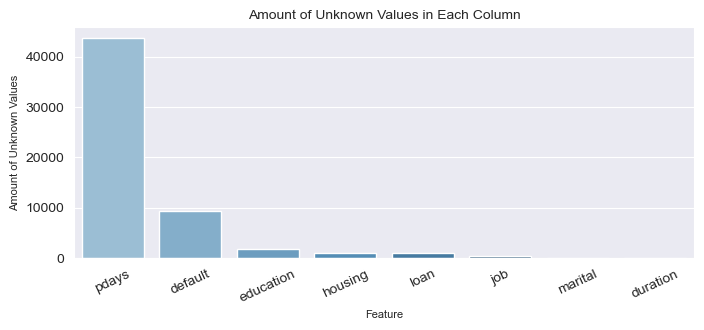

Percentage of Unknown Values in the Data Frame: 1.62%


In [3]:
### Investigating the amount of unknown values in each feature, which include 'unknown' in the categorical columns and '999' in the numerical columns

unknowns = df.isin(['unknown', 999]).sum().sort_values(ascending=False)
unknowns = unknowns[unknowns > 0]

plt.figure(figsize=(8, 3))
sns.set_style('darkgrid')
sns.barplot(x=unknowns.index, y=unknowns.values, palette='Blues_d')
plt.xticks(rotation=25)
plt.title('Amount of Unknown Values in Each Column', fontsize=10)
plt.xlabel('Feature', fontsize=8)
plt.ylabel('Amount of Unknown Values', fontsize=8)
plt.show()

### In a copy of the df, excluding pdays and poutcome from the data frame, writing a print statement to show the percentage unique unknown values in the data frame

df2 = df.drop(['pdays', 'poutcome'], axis=1)
print('Percentage of Unknown Values in the Data Frame: {:.2f}%'.format((df2.isin(['unknown', 999]).sum().sum() / df2.size) * 100))




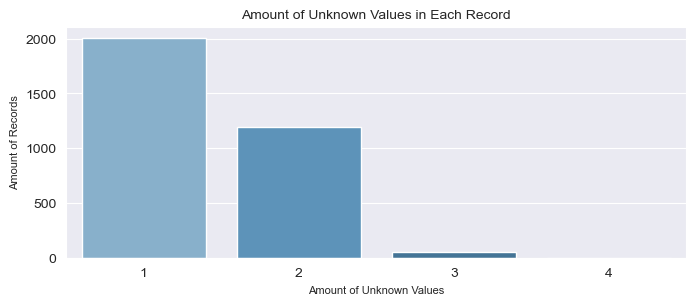

In [4]:
### Visualizing counts of how many unknown values are in each record, excluding zero unknown values and the pdays and default columns

df_null_counts = df.copy().drop(columns=['default', 'pdays'])
unknowns = df_null_counts.isin(['unknown', 999]).sum(axis=1)
unknowns = unknowns[unknowns > 0]
unknowns = unknowns.value_counts()

plt.figure(figsize=(8, 3))
sns.set_style('darkgrid')
sns.barplot(x=unknowns.index, y=unknowns.values, palette='Blues_d')
plt.title('Amount of Unknown Values in Each Record', fontsize=10)
plt.xlabel('Amount of Unknown Values', fontsize=8)
plt.ylabel('Amount of Records', fontsize=8)
plt.show()

##### <ins>*Categorical Features*</ins>

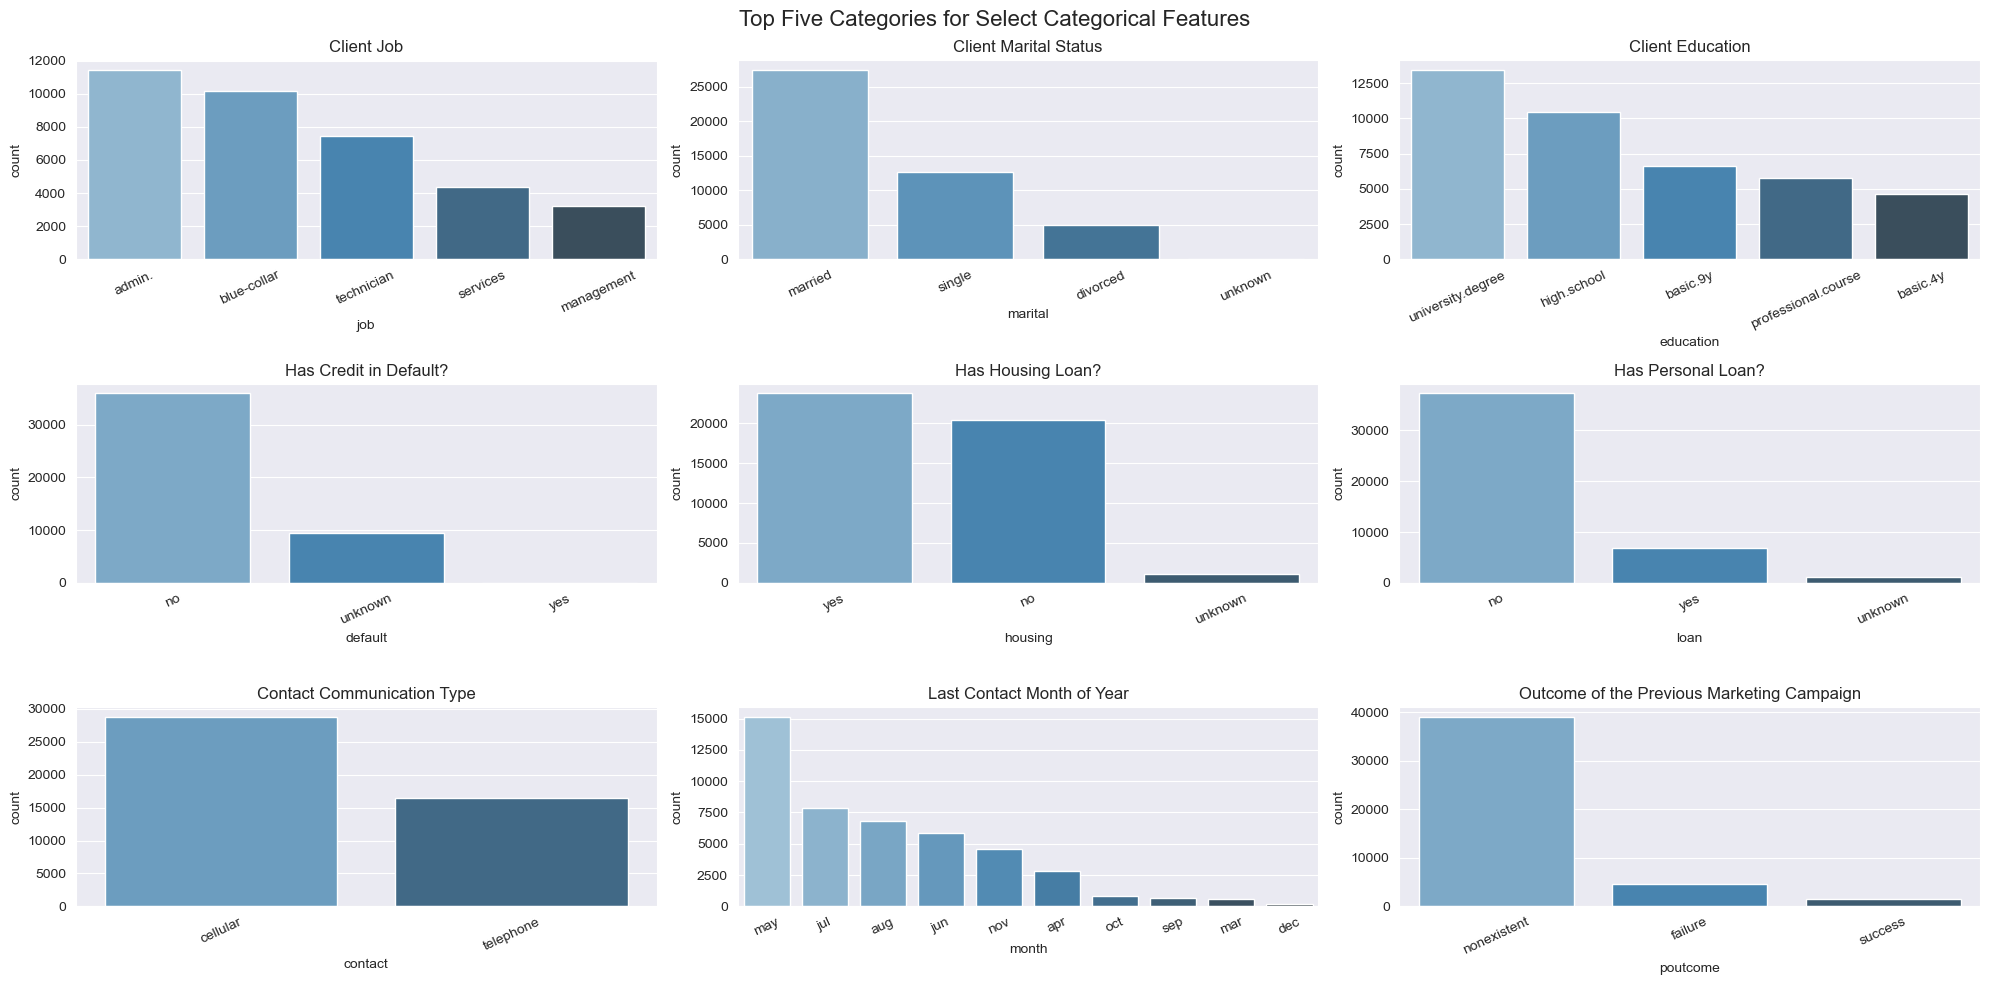

In [5]:
### Visualing the top five categories for key categorical features

fig, ax = plt.subplots(3, 3, figsize=(20, 10))
sns.set_style('darkgrid')
fig.suptitle('Top Five Categories for Select Categorical Features', fontsize=16)
sns.countplot(x='job', data=df, ax=ax[0, 0], palette='Blues_d', order=df['job'].value_counts().iloc[:5].index, )
sns.countplot(x='marital', data=df, ax=ax[0, 1], palette='Blues_d', order=df['marital'].value_counts().iloc[:5].index)
sns.countplot(x='education', data=df, ax=ax[0, 2], palette='Blues_d', order=df['education'].value_counts().iloc[:5].index)
sns.countplot(x='default', data=df, ax=ax[1, 0], palette='Blues_d', order=df['default'].value_counts().iloc[:5].index)
sns.countplot(x='housing', data=df, ax=ax[1, 1], palette='Blues_d', order=df['housing'].value_counts().iloc[:5].index)
sns.countplot(x='loan', data=df, ax=ax[1, 2], palette='Blues_d', order=df['loan'].value_counts().iloc[:5].index)
sns.countplot(x='contact', data=df, ax=ax[2, 0], palette='Blues_d', order=df['contact'].value_counts().iloc[:5].index)
sns.countplot(x='month', data=df, ax=ax[2, 1], palette='Blues_d', order=df['month'].value_counts().index)
sns.countplot(x='poutcome', data=df, ax=ax[2, 2], palette='Blues_d', order=df['poutcome'].value_counts().iloc[:5].index)
ax[0, 0].set_title('Client Job', fontsize=12)
ax[0, 1].set_title('Client Marital Status', fontsize=12)
ax[0, 2].set_title('Client Education', fontsize=12)
ax[1, 0].set_title('Has Credit in Default?', fontsize=12)
ax[1, 1].set_title('Has Housing Loan?', fontsize=12)
ax[1, 2].set_title('Has Personal Loan?', fontsize=12)
ax[2, 0].set_title('Contact Communication Type', fontsize=12)
ax[2, 1].set_title('Last Contact Month of Year', fontsize=12)
ax[2, 2].set_title('Outcome of the Previous Marketing Campaign', fontsize=12)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

##### <ins>*Numerical Features*</ins>

Number of unique outliers removed from age: 459
Number of unique outliers removed from duration: 454
Number of unique outliers removed from campaign: 516
Number of unique outliers removed from pdays: 43655


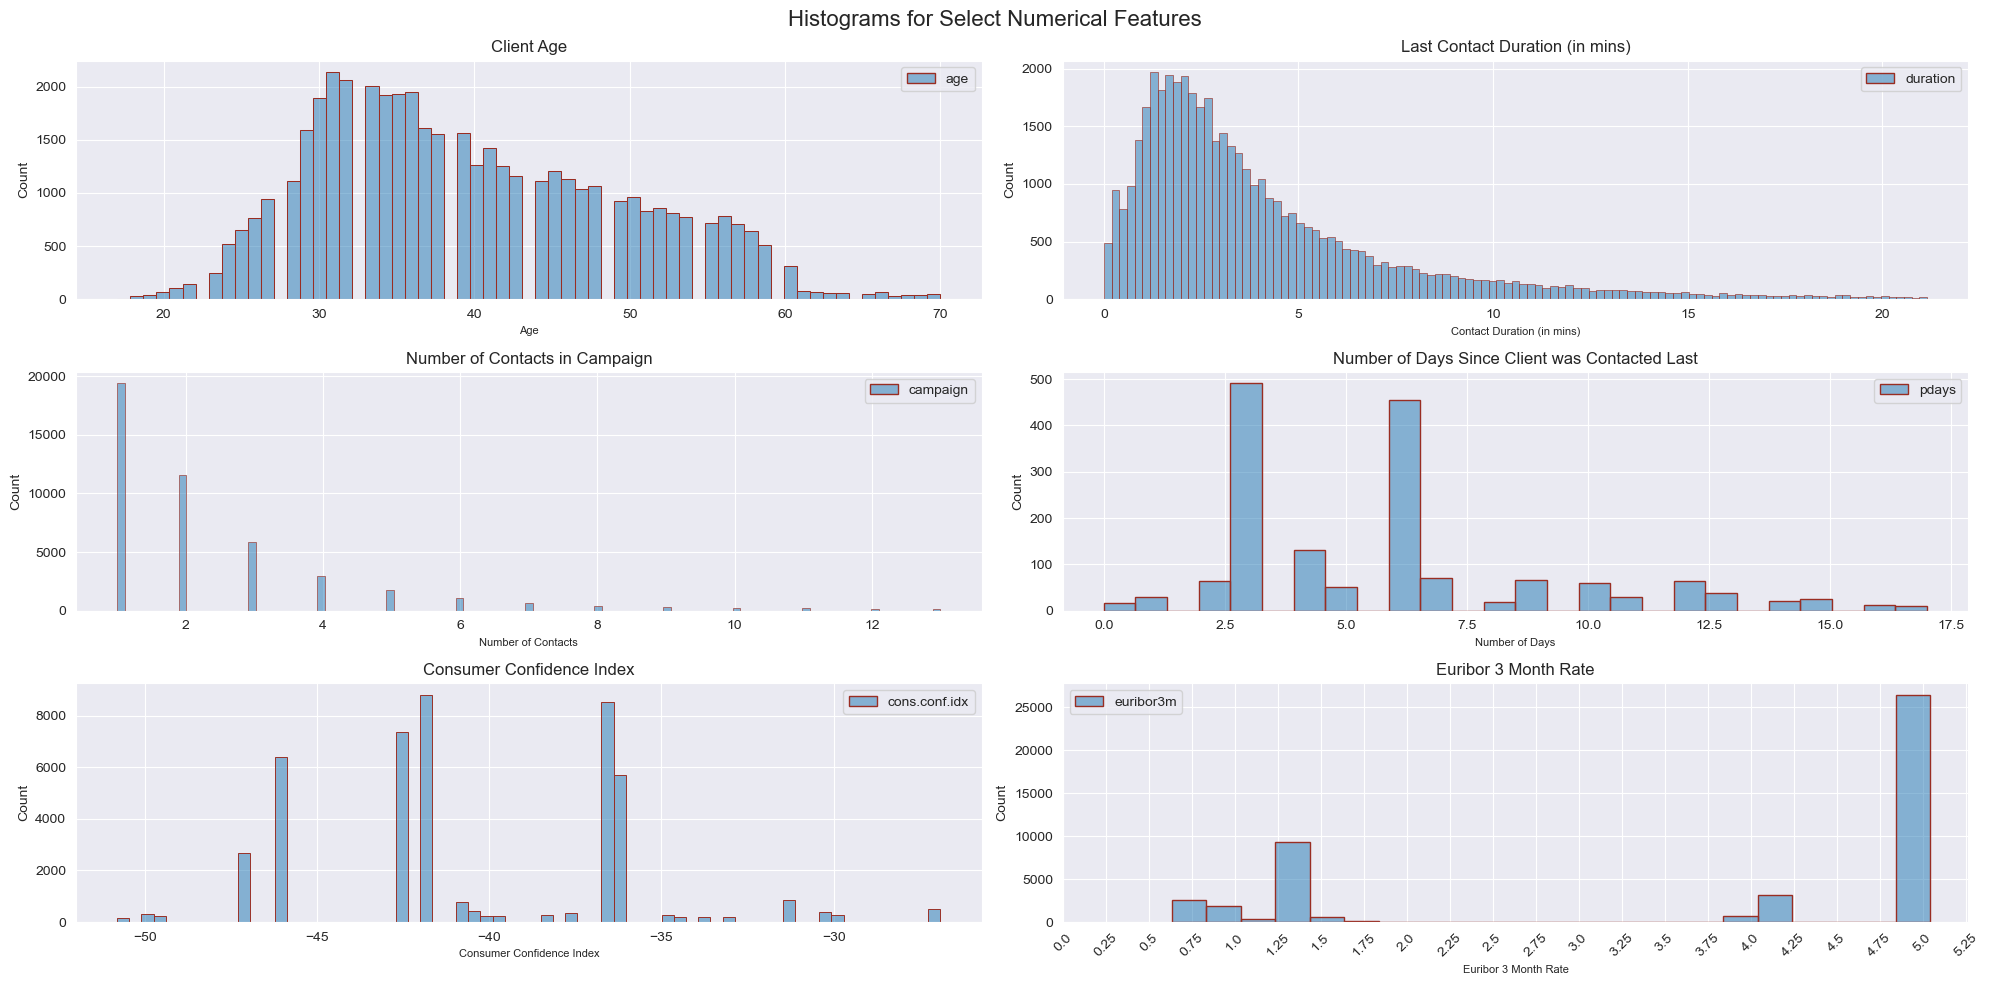

In [6]:
### Making a copy of the dataframe and removing 999's from the pdays column for visualization purposes (as this is meant to be a null value per the dataset documentation)

df_copy = df.copy()
df_copy['pdays'] = df_copy['pdays'].replace(999, np.nan)

### Creating a new dataframe for each numerical feature and removing outliers

age_df = df_copy[['age']]
duration_df = df_copy[['duration']] / 60
campaign_df = df_copy[['campaign']]
pdays_df = df_copy[['pdays']]
con_conf_df = df_copy[['cons.conf.idx']]
euribor3m_df = df_copy[['euribor3m']]
age_df = age_df[age_df['age'] < age_df['age'].quantile(0.99)]
duration_df = duration_df[duration_df['duration'] < duration_df['duration'].quantile(0.99)]
campaign_df = campaign_df[campaign_df['campaign'] < campaign_df['campaign'].quantile(0.99)]
pdays_df = pdays_df[pdays_df['pdays'] < pdays_df['pdays'].quantile(0.99)]


### Printing out the number of unique records that have been removed

print('Number of unique outliers removed from age: {}'.format(df_copy.shape[0] - age_df.shape[0]))
print('Number of unique outliers removed from duration: {}'.format(df_copy.shape[0] - duration_df.shape[0]))
print('Number of unique outliers removed from campaign: {}'.format(df_copy.shape[0] - campaign_df.shape[0]))
print('Number of unique outliers removed from pdays: {}'.format(df_copy.shape[0] - pdays_df.shape[0]))

### Creating histograms for each numerical feature and labeling each x axis, and making the euromibor3m x axis more detailed

fig, ax = plt.subplots(3, 2, figsize=(20, 10))
sns.set_style('darkgrid')
fig.suptitle('Histograms for Select Numerical Features', fontsize=16)
sns.histplot(age_df, ax=ax[0, 0], color='#e74c3c', edgecolor='#992d22')
sns.histplot(duration_df, ax=ax[0, 1], color='#e74c3c', edgecolor='#992d22')
sns.histplot(campaign_df, ax=ax[1, 0], color='#e74c3c', edgecolor='#992d22')
sns.histplot(pdays_df, ax=ax[1, 1], color='#e74c3c', edgecolor='#992d22')
sns.histplot(con_conf_df, ax=ax[2, 0], color='#e74c3c', edgecolor='#992d22')
sns.histplot(euribor3m_df, ax=ax[2, 1], color='#e74c3c', edgecolor='#992d22')
ax[0, 0].set_xlabel('Age', fontsize=8)
ax[0, 1].set_xlabel('Contact Duration (in mins)', fontsize=8)
ax[1, 0].set_xlabel('Number of Contacts', fontsize=8)
ax[1, 1].set_xlabel('Number of Days', fontsize=8)
ax[2, 0].set_xlabel('Consumer Confidence Index', fontsize=8)
ax[2, 1].set_xlabel('Euribor 3 Month Rate', fontsize=8)
ax[0, 0].set_title('Client Age', fontsize=12)
ax[0, 1].set_title('Last Contact Duration (in mins)', fontsize=12)
ax[1, 0].set_title('Number of Contacts in Campaign', fontsize=12)
ax[1, 1].set_title('Number of Days Since Client was Contacted Last', fontsize=12)
ax[2, 0].set_title('Consumer Confidence Index', fontsize=12)
ax[2, 1].set_title('Euribor 3 Month Rate', fontsize=12)
ax[2, 1].set_xticks(np.arange(0, 5.5, 0.25))
ax[2, 1].set_xticklabels(np.arange(0, 5.5, 0.25), rotation=45)
plt.tight_layout()
plt.show()



<div style="text-align:center">
    <img src="Images/target.png" style="width: 30%; border-radius: 10px;"/>
</div>

<a id='exploratory-data-analysis-target'></a>

## **Exploratory Data Analysis: Target**

To get a baseline understanding of the target variable, we will first visualize the **distribution of the target** and then look at the **feature distribution** of records where the interaction resulted in a term deposit. We will take a look at each feature to see if there are any interesting patterns we can observe and apply to modeling

##### <ins>*Target Distribution*</ins>

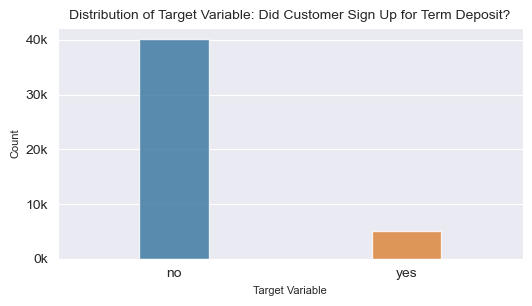

In [7]:
### Investigating the distribution of the target variable

plt.figure(figsize=(6, 3))
sns.set_style('darkgrid')
sns.countplot(x='y', data=df, saturation=0.7, alpha=0.8, width=0.3)
plt.title('Distribution of Target Variable: Did Customer Sign Up for Term Deposit?', fontsize=10)
plt.xlabel('Target Variable', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.yticks(np.arange(0, 45000, 10000), ['0k', '10k', '20k', '30k', '40k'])
plt.show()


##### <ins>*Categorical and Numeric Feature Distributions of 'yes' targets*</ins>

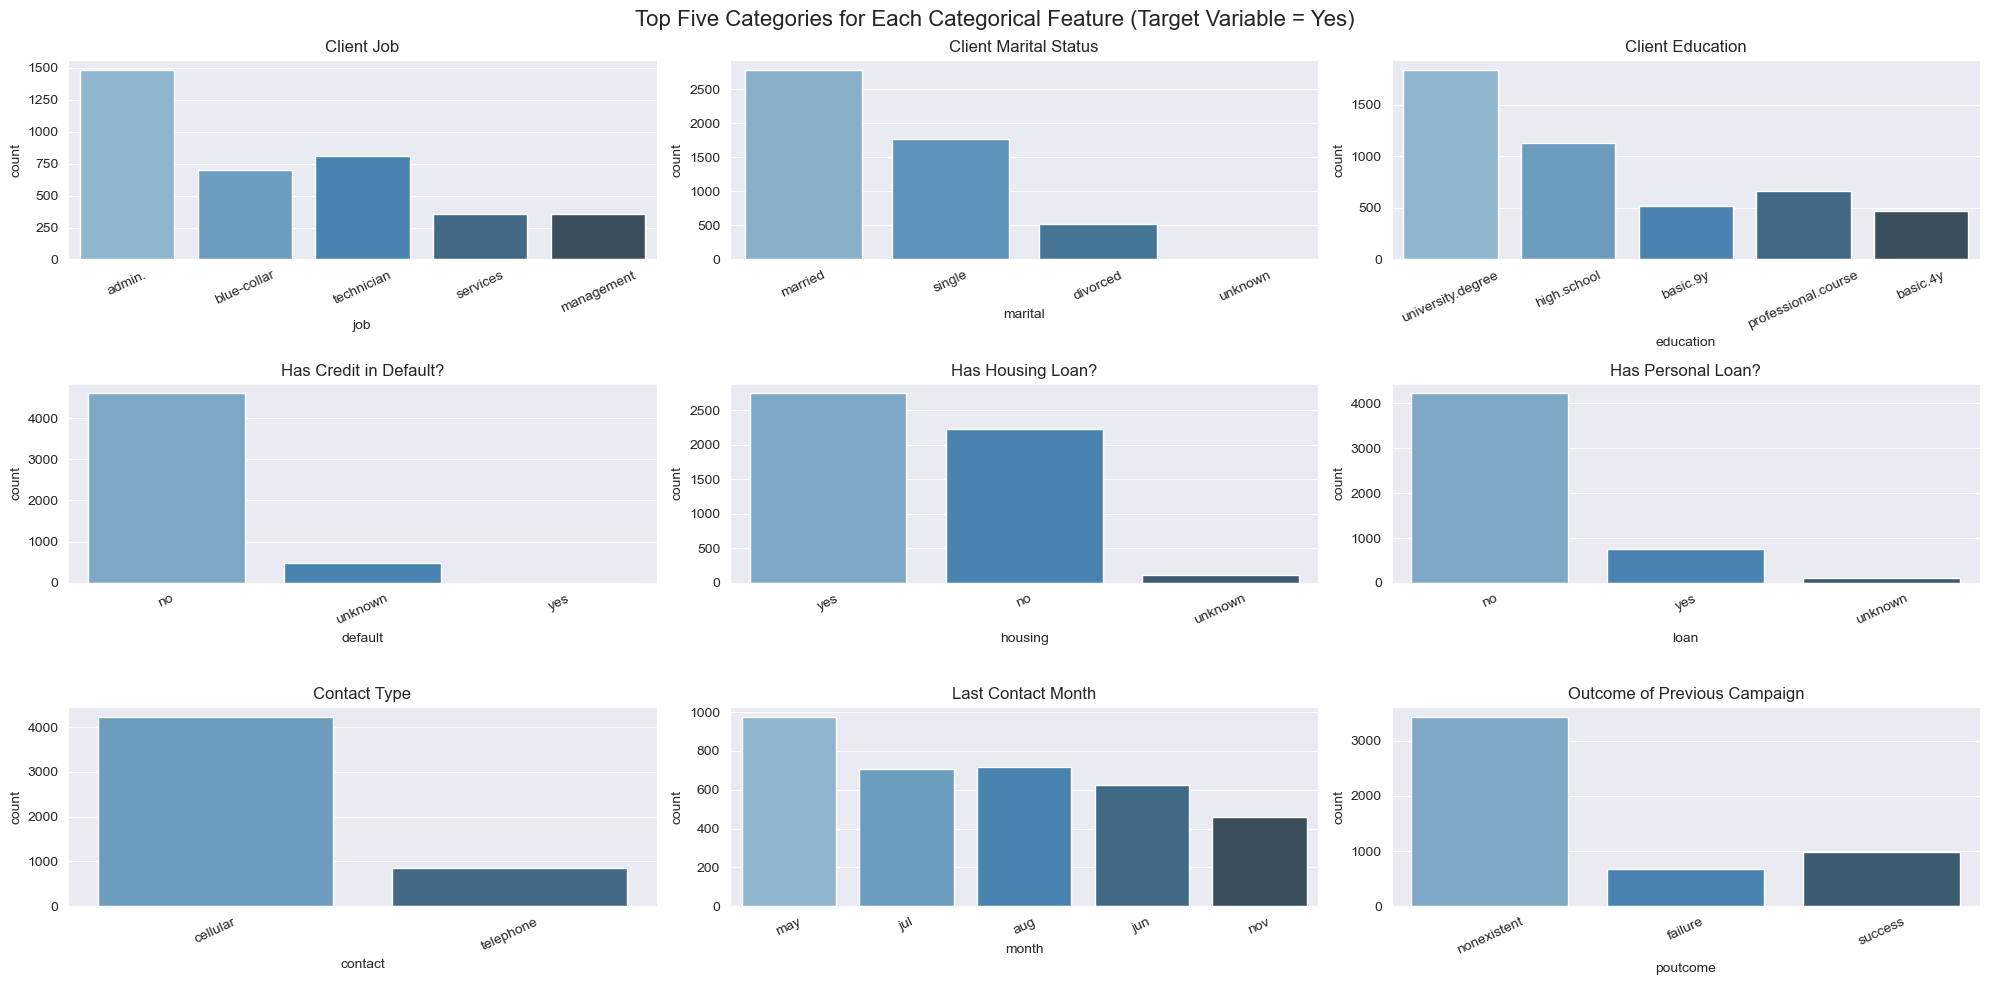

Number of unique outliers removed from age: 55
Number of unique outliers removed from duration: 51
Number of unique outliers removed from campaign: 59
Number of unique outliers removed from pdays: 4039 (this is unique as it removes 999 values which are not previously contacted)


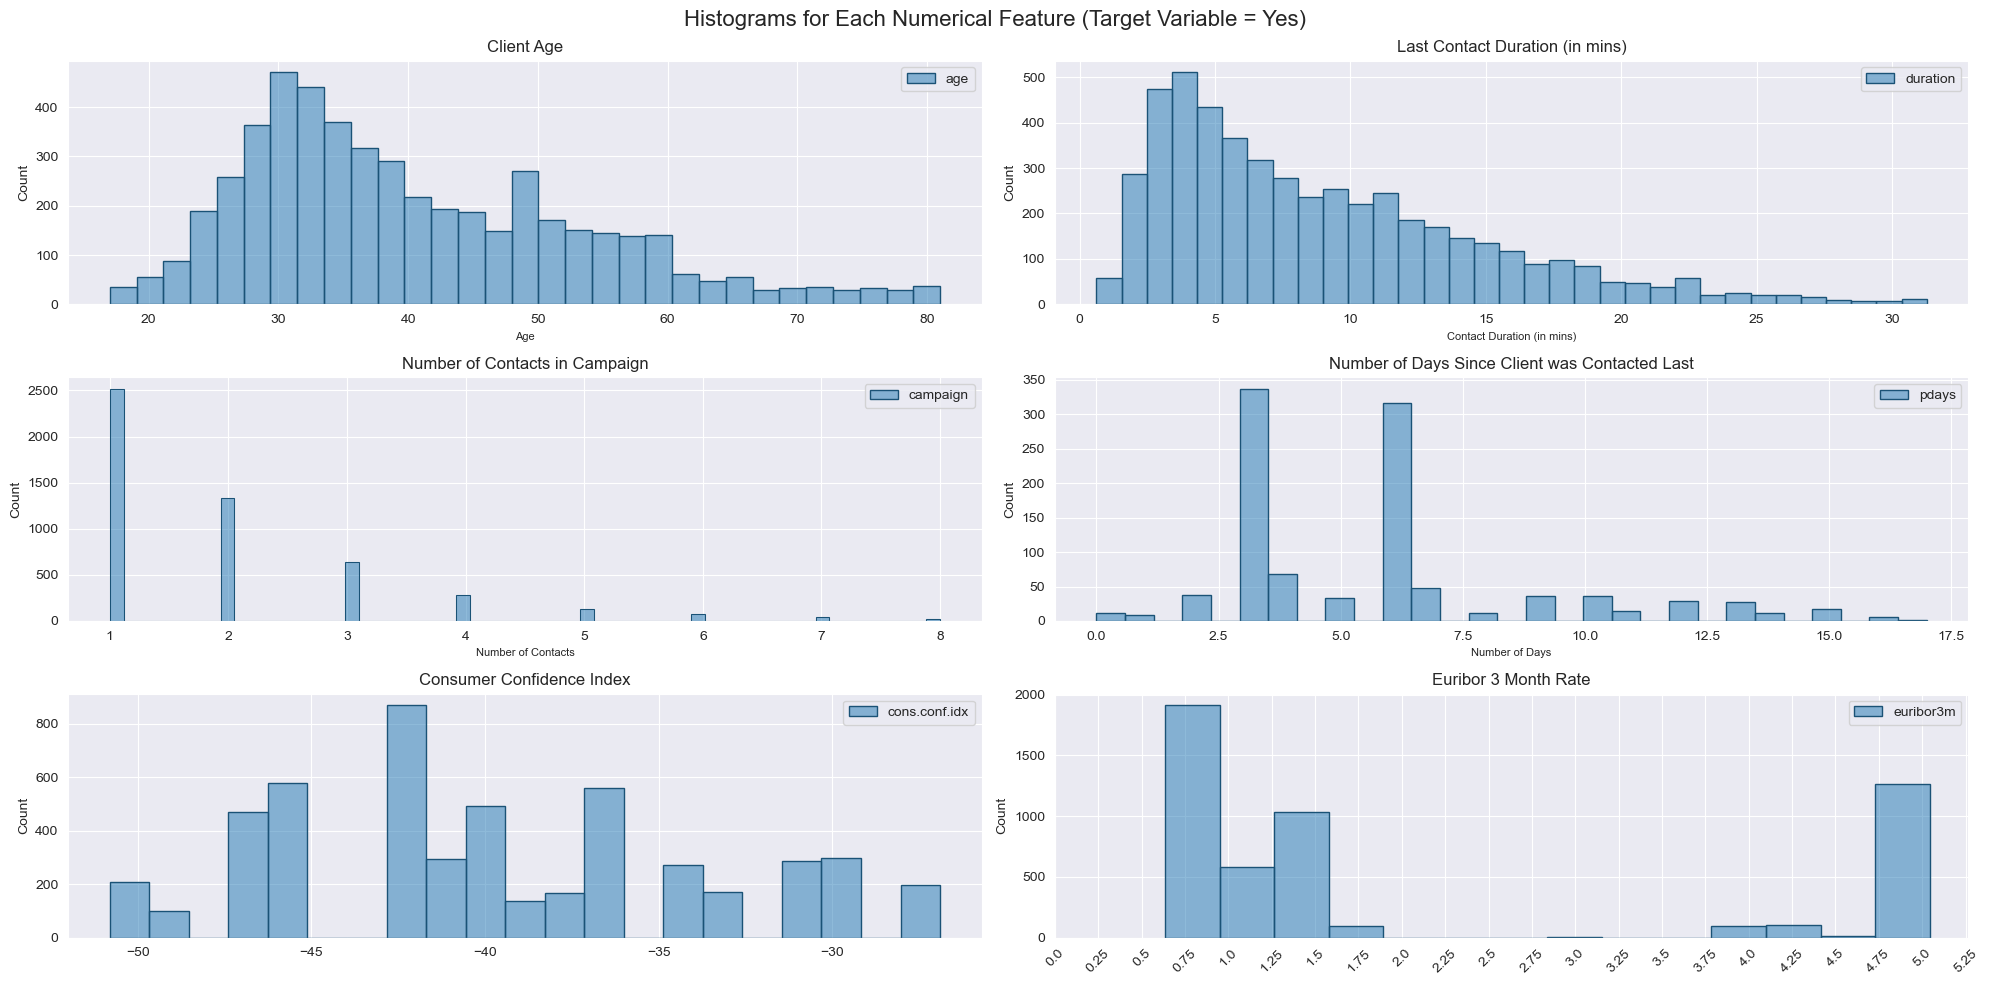

In [8]:
### Making the same categorical and numerical visualizations as above, but this time only for the target variable = 'yes'

fig, ax = plt.subplots(3, 3, figsize=(20, 10))
sns.set_style('darkgrid')
fig.suptitle('Top Five Categories for Each Categorical Feature (Target Variable = Yes)', fontsize=16)
sns.countplot(x='job', data=df[df['y'] == 'yes'], ax=ax[0, 0], palette='Blues_d', order=df['job'].value_counts().iloc[:5].index, )
sns.countplot(x='marital', data=df[df['y'] == 'yes'], ax=ax[0, 1], palette='Blues_d', order=df['marital'].value_counts().iloc[:5].index)
sns.countplot(x='education', data=df[df['y'] == 'yes'], ax=ax[0, 2], palette='Blues_d', order=df['education'].value_counts().iloc[:5].index)
sns.countplot(x='default', data=df[df['y'] == 'yes'], ax=ax[1, 0], palette='Blues_d', order=df['default'].value_counts().iloc[:5].index)
sns.countplot(x='housing', data=df[df['y'] == 'yes'], ax=ax[1, 1], palette='Blues_d', order=df['housing'].value_counts().iloc[:5].index)
sns.countplot(x='loan', data=df[df['y'] == 'yes'], ax=ax[1, 2], palette='Blues_d', order=df['loan'].value_counts().iloc[:5].index)
sns.countplot(x='contact', data=df[df['y'] == 'yes'], ax=ax[2, 0], palette='Blues_d', order=df['contact'].value_counts().iloc[:5].index)
sns.countplot(x='month', data=df[df['y'] == 'yes'], ax=ax[2, 1], palette='Blues_d', order=df['month'].value_counts().iloc[:5].index)
sns.countplot(x='poutcome', data=df[df['y'] == 'yes'], ax=ax[2, 2], palette='Blues_d', order=df['poutcome'].value_counts().iloc[:5].index)
ax[0, 0].set_title('Client Job', fontsize=12)
ax[0, 1].set_title('Client Marital Status', fontsize=12)
ax[0, 2].set_title('Client Education', fontsize=12)
ax[1, 0].set_title('Has Credit in Default?', fontsize=12)
ax[1, 1].set_title('Has Housing Loan?', fontsize=12)
ax[1, 2].set_title('Has Personal Loan?', fontsize=12)
ax[2, 0].set_title('Contact Type', fontsize=12)
ax[2, 1].set_title('Last Contact Month', fontsize=12)
ax[2, 2].set_title('Outcome of Previous Campaign', fontsize=12)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

### Creating a new dataframe for each numerical feature and removing outliers, but this time only for the target variable = 'yes'

age_df = df_copy[df_copy['y'] == 'yes'][['age']]
duration_df = df_copy[df_copy['y'] == 'yes'][['duration']] / 60
campaign_df = df_copy[df_copy['y'] == 'yes'][['campaign']]
pdays_df = df_copy[df_copy['y'] == 'yes'][['pdays']]
cons_conf_idx_df = df_copy[df_copy['y'] == 'yes'][['cons.conf.idx']]
euribor_3m_df = df_copy[df_copy['y'] == 'yes'][['euribor3m']]
age_df = age_df[age_df['age'] < age_df['age'].quantile(0.99)]
duration_df = duration_df[duration_df['duration'] < duration_df['duration'].quantile(0.99)]
campaign_df = campaign_df[campaign_df['campaign'] < campaign_df['campaign'].quantile(0.99)]
pdays_df = pdays_df[pdays_df['pdays'] < pdays_df['pdays'].quantile(0.99)]

### Printing out the number of unique records that have been removed, but this time only for the target variable = 'yes'

print('Number of unique outliers removed from age: {}'.format(df_copy[df_copy['y'] == 'yes'].shape[0] - age_df.shape[0]))
print('Number of unique outliers removed from duration: {}'.format(df_copy[df_copy['y'] == 'yes'].shape[0] - duration_df.shape[0]))
print('Number of unique outliers removed from campaign: {}'.format(df_copy[df_copy['y'] == 'yes'].shape[0] - campaign_df.shape[0]))
print('Number of unique outliers removed from pdays: {} (this is unique as it removes 999 values which are not previously contacted)'.format(df_copy[df_copy['y'] == 'yes'].shape[0] - pdays_df.shape[0]))

### Creating histograms for each numerical feature, but this time only for the target variable = 'yes'

fig, ax = plt.subplots(3, 2, figsize=(20, 10))
sns.set_style('darkgrid')
fig.suptitle('Histograms for Each Numerical Feature (Target Variable = Yes)', fontsize=16)
sns.histplot(age_df, ax=ax[0, 0], color='#3498db', edgecolor='#1a5276')
sns.histplot(duration_df, ax=ax[0, 1], color='#3498db', edgecolor='#1a5276')
sns.histplot(campaign_df, ax=ax[1, 0], color='#3498db', edgecolor='#1a5276')
sns.histplot(pdays_df, ax=ax[1, 1], color='#3498db', edgecolor='#1a5276')
sns.histplot(cons_conf_idx_df, ax=ax[2, 0], color='#3498db', edgecolor='#1a5276')
sns.histplot(euribor_3m_df, ax=ax[2, 1], color='#3498db', edgecolor='#1a5276')
ax[0, 0].set_xlabel('Age', fontsize=8)
ax[0, 1].set_xlabel('Contact Duration (in mins)', fontsize=8)
ax[1, 0].set_xlabel('Number of Contacts', fontsize=8)
ax[1, 1].set_xlabel('Number of Days', fontsize=8)
ax[0, 0].set_title('Client Age', fontsize=12)
ax[0, 1].set_title('Last Contact Duration (in mins)', fontsize=12)
ax[1, 0].set_title('Number of Contacts in Campaign', fontsize=12)
ax[1, 1].set_title('Number of Days Since Client was Contacted Last', fontsize=12)
ax[2, 0].set_title('Consumer Confidence Index', fontsize=12)
ax[2, 1].set_title('Euribor 3 Month Rate', fontsize=12)
ax[2, 1].set_xticks(np.arange(0, 5.5, 0.25))
ax[2, 1].set_xticklabels(np.arange(0, 5.5, 0.25), rotation=45)
plt.tight_layout()
plt.show()


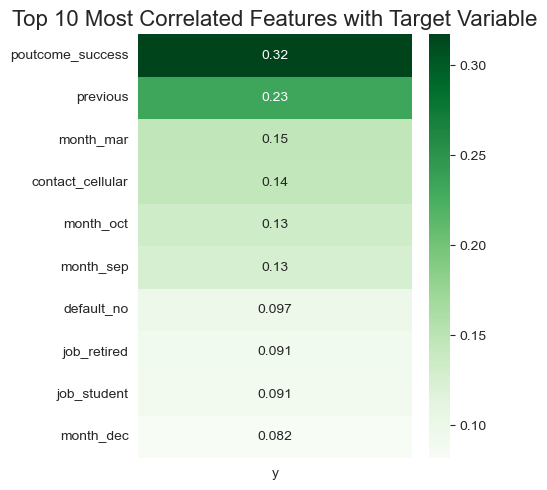

In [9]:
### Making a copy of the original dataframe that drops the 'duration' feature, making the target binary, and one-hot encoding the categorical features

df_copy_ohe = df.copy().drop('duration', axis=1)
df_copy_ohe['y'] = df_copy_ohe['y'].map({'yes': 1, 'no': 0})
df_copy_ohe = pd.get_dummies(df_copy_ohe, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

### Finding the correlation between each feature and the target variable and visualizing the top 10 most correlated features in a sns heatmap

corr = df_copy_ohe.corr()
corr = corr.sort_values(by='y', ascending=False)
corr = corr[['y']]
corr = corr.iloc[1:11]
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Top 10 Most Correlated Features with Target Variable', fontsize=16)
plt.tight_layout()
plt.show()


##### <ins>*Investigating Colinearity*</ins>

It is important to test if there is any colinearity between the features. If there is, we will need to remove one of the features to avoid multicollinearity in our model. The way we do this is to create a correlation matrix and then visualize it using a heatmap. For purposes of this project, **anything above a correlation of 0.7** will be considered colinear:

C:\Users\moore\AppData\Local\Temp\ipykernel_8792\3979919884.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


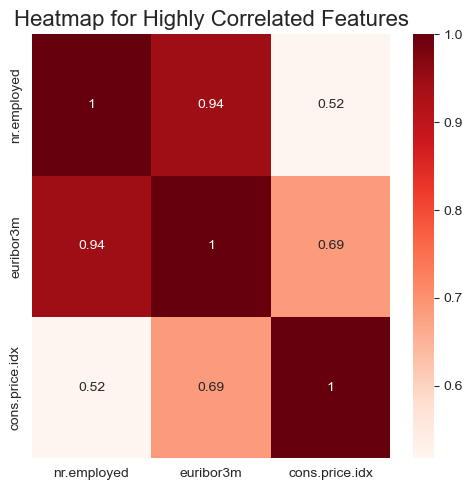

In [10]:
### Creating a correlation matrix for all features and filtering for highly correlted features

corr_threshold = 0.7
corr_matrix = df_copy_ohe.corr()
corr_matrix = df.corr()

### Creating a list of highly correlated features by use of a for loop that looks to see the corr value is greater than the threshold

highly_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname = corr_matrix.columns[i]
            highly_corr_features.append(colname)

### Keeping only the highly colinear features for vizualization purposes

highly_corr_features = list(set(highly_corr_features))
highly_corr_features = df_copy_ohe[highly_corr_features]

### Creating a heatmap for the highly correlated features

plt.figure(figsize=(5, 5))
sns.heatmap(highly_corr_features.corr(), annot=True, cmap='Reds')
plt.title('Heatmap for Highly Correlated Features', fontsize=16)
plt.tight_layout()
plt.show()


<div style="text-align:center">
    <img src="Images/summary.jpg" style="width: 50%; border-radius: 10px;"/>
</div>

<a id='exploratory-data-analysis-summary'></a>

## **Exploratory Data Analysis: Summary**

In summary, we found the following insights as a result of our exploratory data analysis:

##### <ins>*High Level Data Findings*</ins>

- The dataset has features which can broadly be categorized as:

    - Client data *(such as age, job, marital status, etc.)*
    - Campaign data *(such as number of contacts, days since last contact, etc.)*, and
    - External data *(such as consumer price index, employment variation rate, etc.)*
<br>
</br>
- Most of the data is categorical, with only 10% of the columns being numerical

- The dataset is mostly complete, with only 1% of records having missing data excluding the default and pcontact category. Of that 1%, half have one missing field and most others have two. Records missing more than two fields are rare

    - Note: the 'default' feature is considered seperate from the other features when evaluating missing data because this category likely extends to if the customer has defaulted credit **anywhere**, not just with the bank running the campaign. This is likely a very sensative topic and the call center agents may not have been advised to ask about it. This is likely why the default category contains by far the most 'unknown' values
    <br>
    </br>
    -Note: the 'pcontact' feature is considered seperate from the other features when evaluating missing data because most customers contacted have not been contacted before. This is likely why the pcontact category contains by far the most 'unknown' values

##### <ins>*Feature Findings*</ins>

- The average age is around 30, with the majority of customers being between 30 and 40 years old
<br>
</br>
- The majority of customers are highly educated and have families
<br>
</br>
- The the job feature is very vague, with most customers having an 'admin' or 'blue collar' job
<br>
</br>
- The majority of customers have not been contacted before, and the majority of customers have been contacted less than 5 times
<br>
</br>
- The majority of customers have not been contacted in the last 3 months, and the majority of customers have been contacted less than 10 days ago

##### <ins>*Target Variable Findings*</ins>

- The target variable is imbalanced, with only 11% of customers subscribing to a term deposit
<br>
</br>
- Customers who subscribe to a term deposit are generally older, have higher education, and have higher incomes
<br>
</br>
- Customers who subscribe to a term deposit are generally contacted more frequently, and have been contacted more recently
<br>
</br>
- Customers who have subscribed to a term deposit in the past are more likely to subscribe again as indicated by the correlation between the 'poutcome' and 'y' features
<br>
</br>
- An interesting finding is that EURIBOR 3 month rate trends lower for customers who subscribe to a term deposit. We would expect the opposite, as a lower rate would mean a lower return on investment for the bank. This could be due to the fact that the bank is offering a higher rate to customers who subscribe to a term deposit, or it could be due to the fact that the bank is offering a lower rate to customers who do not subscribe to a term deposit. This is something to keep in mind when modeling

<div style="text-align:center">
    <img src="Images/preprocessing.png" style="width: 30%; border-radius: 10px;"/>
</div>

<a id='data-preprocessing'></a>

## **Data Preprocessing**

In order to prepare the data for modeling, we will perform the following steps:

##### <ins>*Before the train / test split*</ins>

1. *Cast object data types as the category data type and ordinate the categories where applicable*
    - We will cast the object data types as the category data type to save memory and improve performance
    - We will ordinate the categories where applicable
        - For example, we will ordinate the 'education' feature from least to most education
<br>
</br>
2. *Drop features*
    - We will drop the 'duration' feature because it is not known before a call is performed
    - We will drop the 'default' feature because it is contains many missing values and is not heavily correlated with the target variable

##### <ins>*Train / test split*</ins>

3. *Split data into train and test sets*
    - We will split the data into train and test sets using an 80/20 split

##### <ins>*After the train / test split*</ins>

4. *Perform SMOTE oversampling on the train set*
    - We will perform SMOTE oversampling on the train set to balance the target variable
<br>
</br>
5. *Encode categorical features*
    - We will encode the categorical features using a one-hot encoding function
<br>
</br>
6. *Scale numerical features*
    - We will scale the numerical features using the standard scaler

##### <ins>*Code - Before the train / test split*</ins>

In [11]:
### Making functions that handle the categorical features in the data set

def cast_as_columns(df):
    columns_to_categorize = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
    for column in columns_to_categorize:
        df[column] = df[column].astype('category')
    return df

def ordinal_encode_education(df):
    df['education'] = df['education'].cat.reorder_categories(['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 
                                                              'high.school', 'professional.course', 'university.degree'])
    df['education'] = df['education'].cat.codes
    return df

def encode_target(df):
    df['y'] = df['y'].cat.codes
    return df

### Making a function that drops the 'duration' and 'default' features from the dataframe, since they are not useful for the model and contain too many missing values

def drop_features(df):
    df = df.drop(['duration', 'default'], axis=1)
    return df

### Making a funtion that drops the consumer price index and the number of employees features, since they are highly correlated with each other and not correlated with the target variable

def drop_features_corr(df):
    df = df.drop(['cons.price.idx', 'nr.employed'], axis=1)
    return df


### Making a function that sets the 999 value in the 'pdays' feature to 0, since it means the client was not contacted before

def set_pdays_to_zero(df):
    df['pdays'] = df['pdays'].replace(999, 0)
    return df

### Writing a function that combines the above functions

def clean_data(df):
    df = cast_as_columns(df)
    df = ordinal_encode_education(df)
    df = drop_features(df)
    df = set_pdays_to_zero(df)
    df = drop_features_corr(df)
    df = encode_target(df)
    return df

### Making a copy of the original dataframe and cleaning it

df_clean = df.copy()
df_clean = clean_data(df_clean)

##### <ins>*Code - The train / test split*</ins>

In [12]:
### Performing a train-test split on the cleaned dataframe and casting as pandas dataframes

from sklearn.model_selection import train_test_split

X = df_clean.drop('y', axis=1)
y = df_clean['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=312)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
y_train = pd.DataFrame(y_train, columns=['y'])
y_test = pd.DataFrame(y_test, columns=['y'])

##### <ins>*Code - After train / test split*</ins>

In [13]:
### Writing a function that performs a one hot encodes the categorical features X_train and X_test and drops the original categorical features

def one_hot_encode(X_train, X_test):
    for column in X_train.columns:
        if X_train[column].dtype == 'category':
            X_train = pd.get_dummies(X_train, columns=[column], prefix=column)
            X_test = pd.get_dummies(X_test, columns=[column], prefix=column)
    return X_train, X_test

### Writing a function that performs a standard scaler on the numerical features X_train and X_test

def standard_scale(X_train, X_test):
    from sklearn.preprocessing import StandardScaler
    for column in X_train.columns:
        if X_train[column].dtype != 'category':
            scaler = StandardScaler()
            X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1))
            X_test[column] = scaler.transform(X_test[column].values.reshape(-1, 1))
    return X_train, X_test

### Writing a function that SMOTES the training data

from imblearn.over_sampling import SMOTE

def smote(X_train, y_train):
    sm = SMOTE(random_state=312)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    return X_train, y_train

### Writing a function that combines the above functions

def preprocess_data(X_train, X_test, y_train, y_test):
    X_train, X_test = one_hot_encode(X_train, X_test)
    X_train, X_test = standard_scale(X_train, X_test)
    X_train, y_train = smote(X_train, y_train)
    return X_train, X_test, y_train, y_test

In [14]:
### Preprocessing the data

X_train_processed, X_test_processed, y_train_processed, y_test_processed = preprocess_data(X_train, X_test, y_train, y_test)

<div style="text-align:center">
    <img src="Images/modeling.png" style="width: 30%; border-radius: 10px;"/>
</div>

<a id='scoring-functions-and-baseline-model'></a>

## **Scoring Functions and Baseline Model**

Now that we have prepared the data, we will define a few scoring functions to evaluate our models and make a baseline model to compare our other models to. 

Our primary metric for evaluating our models will be **recall**, as we want to minimize the number of customers who would subscribe to a term deposit that we do not contact. 

From a marketing strategy perspective, we are not very sensative to false positives, as we would rather contact a customer who would not subscribe to a term deposit than not contact a customer who would subscribe to a term deposit. A false positive is just a cold-call that does not result in any new business, which as we saw in our target variable EDA, tends to happen most of the time.

No call center is perfect but this machine learning method would at least point the call center in the right direction in terms of who to contact first so time is not wasted with low probability cold-calls. 

We will use accuracy, precision, f1 score, and AUC as secondary metrics to evaluate our models to make sure we are not overfitting to the recall metric causing the other metrics to fall to single digits / zero.

In [15]:
### Writing a function that will score each model and print side by side seaborn confusion matrices

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    ### Fitting the model and making predictions
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ### Printing the training, cross validation, and test results

    print('------------TRAINING RESULTS--------------')
    print()
    print('Train AUC: {}'.format(roc_auc_score(y_train, y_train_pred)))
    print('Train Accuracy: {}'.format(accuracy_score(y_train, y_train_pred)))
    print('Train Precision: {}'.format(precision_score(y_train, y_train_pred)))
    print('Train Recall: {}'.format(recall_score(y_train, y_train_pred)))
    print('Train F1: {}'.format(f1_score(y_train, y_train_pred)))
    print()
    print('------------CROSS VALIDATION--------------')
    print()
    print('Cross Validation AUC: {}'.format(np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc'))))
    print('Cross Validation Accuracy: {}'.format(np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))))
    print('Cross Validation Precision: {}'.format(np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='precision'))))
    print('Cross Validation Recall: {}'.format(np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='recall'))))
    print('Cross Validation F1: {}'.format(np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='f1'))))
    print()
    print('------------TEST RESULTS------------------')
    print()
    print('Test AUC: {}'.format(roc_auc_score(y_test, y_test_pred)))
    print('Test Accuracy: {}'.format(accuracy_score(y_test, y_test_pred)))
    print('Test Precision: {}'.format(precision_score(y_test, y_test_pred)))
    print('Test Recall: {}'.format(recall_score(y_test, y_test_pred)))
    print('Test F1: {}'.format(f1_score(y_test, y_test_pred)))

    ### Plotting the confusion matrices and adding lines to separate the matrices

    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='g', ax=ax[0], cmap='Blues')
    ax[0].set_title('Training Confusion Matrix')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='g', ax=ax[1], cmap='Blues')
    ax[1].set_title('Test Confusion Matrix')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Actual')
    plt.show()
    
    ### If the model has a feature_importances_ or coef_ attribute, taking the absolute value of the coefficients and printing the top 5 features

    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance'])
        feature_importances = feature_importances.abs().sort_values('importance', ascending=False)
        print('Top 5 Features')
        print()
        print(feature_importances.head())

    elif hasattr(model, 'coef_'):
        feature_importances = pd.DataFrame(model.coef_[0], index=X_train.columns, columns=['importance'])
        feature_importances = feature_importances.abs().sort_values('importance', ascending=False)
        print('Top 5 Features')
        print()
        print(feature_importances.head())
    

------------TRAINING RESULTS--------------

Train AUC: 0.5
Train Accuracy: 0.5
Train Precision: 0.0
Train Recall: 0.0
Train F1: 0.0

------------CROSS VALIDATION--------------

Cross Validation AUC: 0.5
Cross Validation Accuracy: 0.49998445636123423
Cross Validation Precision: 0.09999222818061708
Cross Validation Recall: 0.2
Cross Validation F1: 0.1333264248704663

------------TEST RESULTS------------------

Test AUC: 0.5
Test Accuracy: 0.8883248730964467
Test Precision: 0.0
Test Recall: 0.0
Test F1: 0.0


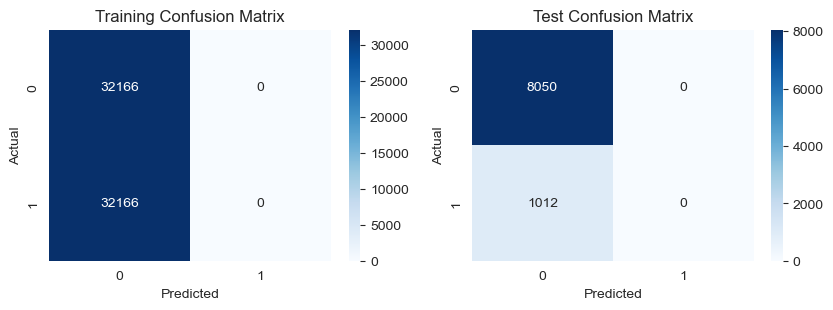

In [16]:
### Applying the training set to a dummy classifier to get a baseline accuracy score

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train_processed, y_train_processed)

### Evaluating the dummy classifier
evaluate_model(dummy_clf, X_train_processed, X_test_processed, y_train_processed, y_test_processed)

The dummy classifier performance will be used as a baseline model to compare our other models to. 
<br>
</br>
In practice, the dummy classifier is a classifier that makes random predictions based on the class distribution of the training set. As you can see, it simply predicts all test set interactions as zero, which is technically pretty accurate based off of the test set composition, but since our key metric is recall this is not a well performing model. 

As far as starter models go though, this is a good baseline model because it is a good representation of a model that does not use any machine learning. This is important because we want to make sure that our machine learning models are actually improving upon the baseline model

<div style="text-align:center">
    <img src="Images/tuning.png" style="width: 30%; border-radius: 10px;"/>
</div>

<a id='final-modeling'></a>

## **Final Modeling and Results**

Please see the appendix for a detailed description of the model iterations, hyperparamter tuning, and regularization techniques used to arrive at the final model. Our final model ended up being a logistic regression model with the following parameters:

------------TRAINING RESULTS--------------

Train AUC: 0.7102686066032456
Train Accuracy: 0.7102686066032456
Train Precision: 0.7142042755344418
Train Recall: 0.7010818877075172
Train F1: 0.7075822469054454

------------CROSS VALIDATION--------------

Cross Validation AUC: 0.7472551294005984
Cross Validation Accuracy: 0.7098956040364219
Cross Validation Precision: 0.7140086818777329
Cross Validation Recall: 0.7003358257113894
Cross Validation F1: 0.707100793114283

------------TEST RESULTS------------------

Test AUC: 0.723828345567476
Test Accuracy: 0.722688148311631
Test Precision: 0.24722128662849444
Test Recall: 0.7252964426877471
Test F1: 0.36875156995729713


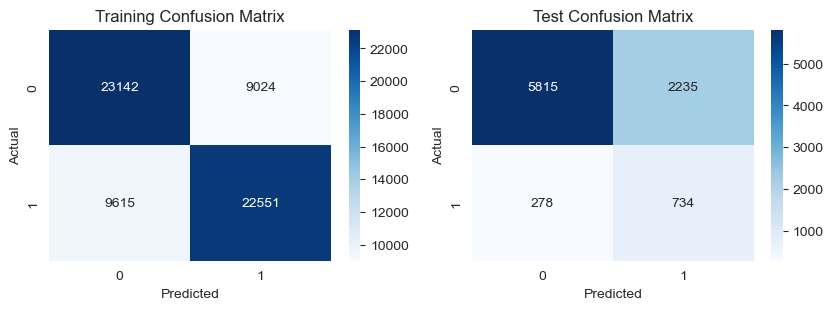

Top 5 Features

                  importance
euribor3m           0.237636
poutcome_success    0.104087
emp.var.rate        0.026597
month_may           0.000000
loan_unknown        0.000000


In [17]:
### Evaluating the final model, which was determined to be a logistic regression model with the following hyperparameters

from sklearn.linear_model import LogisticRegression

lr_final = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.9, C=0.0001, random_state=312)
evaluate_model(lr_final, X_train_processed, X_test_processed, y_train_processed, y_test_processed)

<div style="text-align:center">
    <img src="Images/results_analysis.jpg" style="width: 30%; border-radius: 10px;"/>
</div>

<a id='feature-evaluation'></a>

## **Feature Evaluation and Analysis**

##### <ins>*Feature Importance*</ins>

As we can see, there are really only **three features** that the model is relying on to make predictions. These features are:

- The current EURIBOR 3 month rate (euribor3m, negative coefficient of -.237)
- The status of the customer's decision to take a term deposit in the past (poutcome, positive coefficient of .104), and
- The employment variation rate (emp.var.rate, negative coefficient of -.02)

Currently, the model is **not using any other features** as they do not appear to be significant in determining whether or not a customer will subscribe to a term deposit. This is not surprising, as we saw in our EDA that **only a few features** were correlated with the target variable, the highest being the if the customer previously subscribed to a term deposit (poutcome).

##### <ins>*Considering Missing Features*</ins>

There are a couple of reasons why the model may not be using the features in the dataset when this problem is thought about from a business perspective. There are a few key elements the data set is missing that would be very helpful in determining whether or not a customer will subscribe to a term deposit. To name just a few:

- *The term deposit rate offered to the customer*
<br>
</br>
    - The attractiveness of the interest rate offered to the customer is likely the most important factor in determining whether or not a customer will subscribe to a term deposit. 
    - If the rate is attractive and is higher than the current market rate, the customer is more likely to subscribe to a term deposit as an investor would get more on their return. 
    - EURIBOR and the employment variation rate are decent indicators of how the market is performing and how strong the economy is, but they are not the same as the actual rate offered to the customer which would be highly applicable to the customer's decision to subscribe to a term deposit
<br>
</br>
- *The customer's current financial situation*
<br>
</br>
    - The customer's current financial situation is another important missing factor. If the customer is in a good financial situation with a solid balance sheet, they are more likely to subscribe to a term deposit as they are more likely to have the liquid assets to invest. 
    - We could only loosely infer this based off of the customer's education level and job. This is not a good way to determine the customer's current financial situation for two reasons: 
        - A customer with a high education level and a high paying job could still be in a bad financial situation if they have a lot of debt from student loans or a mortgage, and
        - As we saw in the EDA, the education level and job are categorical variables that within themselves could have a lot of variation not detailed in this dataset (i.e., many of the jobs were just labeled 'admin' or 'blue-collar' and not specific enough to determine the customer's financial situation)
<br>
</br>
- *The customer's current financial goals*
<br>
</br>
    - The customer's current financial goals are likely the third most important factor in determining whether or not a customer will subscribe to a term deposit and it is not included in the dataset. If the customer is looking to invest in a term deposit to save for retirement, they are more likely to subscribe to a term deposit. 
    - We could only loosely infer this based off of the customer's age. This is not a good way to determine the customer's current financial goals for two reasons: 
        - A customer's age does not necessarily correlate with their financial goals, and
        - The customer's age is a continuous variable that within itself could have a lot of variation not detailed in this dataset (i.e., a customer could be 30 years old and be saving for retirement, or a customer could be 60 years old and be saving for a down payment on a new house)

<a id='model-evaluation'></a>

## **Model Evaluation Considerations**

Our baseline model was a dummy classifier that predicted all test set interactions as zero. This model was decently accurate, but not practical as it did not predict any of the customers who would subscribe to a term deposit.

Our final model had the following scores:

- Test AUC: 72%
- Test Accuracy: 73%
- Test Precision: 25%
- Test Recall: 73%
- Test F1: 39%

The final model is a significant improvement over the baseline model, as it can predict 73% of the customers who would subscribe to a term deposit. 

Since we optimized for recall and minimized false negatives (model predicts they wont, when in reality they will), the call center will cast a wider net over its customer base and contact more customers who may subscribe to a term deposit at the cost of some additional false positives (model predicts they will, when in reality they don't). 

After all, it is less costly to spend a few minutes trying to contact and sell a term deposit to a customer than it is to miss out on potential business.

<div style="text-align:center">
    <img src="Images/app.png" style="width: 30%; border-radius: 10px;"/>
</div>

<a id='app-development'></a>

## **App Development and Deployment**

In order to deploy the model to the marketing team, we will need to develop a no code app that can be used to determine the probability an interaction will result in a customer subscribing to a term deposit.

We will use Streamlit to develop the app and Heroku to deploy the app.

Our high level workflow will be as follows:

1. Marketing employee inputs a list of customer leads into the app
2. The app will perform the following steps:
    - Clean the data
    - Perform the same preprocessing steps as the model
    - Make predictions using the model
    - Return the predictions to the marketing employee
3. The marketing employee will use the predictions to prioritize which customers to contact first

**Please see the App folder for the code used to develop the app**

In [18]:
### Writing the final model to a pickle file

import pickle

with open('App/final_model.pkl', 'wb') as f:
    pickle.dump(lr_final, f)

In [19]:
### Making a dataframe for each target

df_yes = df[df['y'] == 'yes']
df_no = df[df['y'] == 'no']

### Taking the first 4000 rows of each dataframe and appending them to a new dataframe

df_yes_sample = df_yes.iloc[:4000]
df_no_sample = df_no.iloc[:4000]

df_sample = df_yes_sample.append(df_no_sample)
df_sample = df_sample.drop(columns=['y'], axis=1)

### Writing df_sample to a csv file

df_sample.to_csv('App/sample_data.csv', index=False)

<div style="text-align:center">
    <img src="Images/summary.png" style="width: 35%; border-radius: 10px;"/>
</div>

<a id='conclusion'></a>

## **Conclusion and Next Steps**

##### <ins>*High-Level Summary*</ins>

In this project, we were able to utilize the dataset from a Portuguese bank to develop a model that can predict whether or not a customer will subscribe to a term deposit.
<br>
</br>
Recall was our primary metric of interest, as we wanted to minimize the number of customers who would subscribe to a term deposit and not be contacted by the call center.
<br>
</br>
While there were not many existing features that were relevant in determining if a customer would subscribe, there were enough to develop a model that can predict 73% of the customers who would subscribe to a term deposit. This model is a significant improvement over the baseline model, which had a recall of 0.0 and an accuracy of 50%. The limitations of the data and features that would be highly relevant in determining if a customer would subscribe (product on offer, customer financial situation and needs, etc) to a term deposit were also discussed.
<br>
</br>
We were also able to develop a no code app that can be used by the marketing team to determine the probability an interaction will result in a customer subscribing to a term deposit. The app can be deployed locally on machines, however there are some limitations to the app that would need to be addressed if it were to be deployed in a real-life scenario.

##### <ins>*Next Steps*</ins>

If this were a real-life project and were to be deployed to the marketing team, there are a few next steps that would need to be taken to ensure the model is being used effectively and is helping the marketing team achieve its goals:

- **Collect more data points and data features** - The dataset is useful for a baseline model, but there are certain data features that would be highly relevant in determining if a customer would subscribe to a term deposit (product on offer, customer financial situation and needs, etc) that are not included in the dataset. If the marketing team were to collect more data points and data features, they would be able to develop a more accurate model that can predict more customers who would subscribe to a term deposit.

- **Develop a more robust app** - The app that was developed for this project is a no code app that can be used to determine the probability an interaction will result in a customer subscribing to a term deposit. However, there are some limitations to the app that would need to be addressed if it were to be deployed in a real-life scenario. For example, the app can only be deployed locally on machines and cannot yet be deployed on the cloud.

- **Have the model automatically retrain itself** - If the app is deployed, the model will need to be retrained on a regular basis to ensure it is up to date with the latest data. If there was an established workflow around using the app and the necessary code is written, the model could be retrained automatically on a regular basis.

<div style="text-align:center">
    <img src="Images/iterations.png" style="width: 50%; border-radius: 10px;"/>
</div>

<a id='appendix-model-iterations'></a>

## **Appendix: Modeling Iterations and Grid Searches**

For a machine learning classifier, there are a few popular models that can be employed to solve a classification problem. These models include:

- *Logistic Regression*
- *Decision Trees*
- *Random Forests*
- *Gradient Boosting*
- *Support Vector Machines*
- *Neural Networks*

We will iterate through these models and evaluate their performance. We will also perform hyperparameter tuning on the models that we think will be the most practical and effective for deployment in a production environment and choose the best model for implementation in our application. We will perform testing over all except the neural network model, as it is very computationally expensive to execute and would not be practical for our small scale app rollout.

##### <ins>*Making Comparative Evaluation Functions*</ins>

Before we get into any modeling steps, it would be useful to make a few functions that will help us evaluate our models. We will make a function that will fit an predict on a list of models, and then make a function that will visualize the results of the models on a heatmap

In [20]:
### Making a function that evaluates each classifier in the list and returns the recall results for the training and test sets in a dataframe

def evaluate_classifiers(classifiers, X_train, X_test, y_train, y_test):

        results = pd.DataFrame(columns=['Classifier', 'Train Recall', 'Test Recall'])
        
        for classifier in classifiers:
            
            classifier.fit(X_train, y_train)
            y_train_pred = classifier.predict(X_train)
            y_test_pred = classifier.predict(X_test)
            
            result = {'Classifier': classifier.__class__.__name__,
                    'Train Recall': recall_score(y_train, y_train_pred),
                    'Test Recall': recall_score(y_test, y_test_pred)}
            
            results = results.append(result, ignore_index=True)
            
        return results

### Making a function that displays the train and test recall results in a heatmap

def display_recall_heatmap(results):
    
    results = results.set_index('Classifier')
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(results, annot=True, cmap='Blues', ax=ax)
    ax.set_title('Recall Results')
    plt.show()

##### <ins>*Running baseline classifiers*</ins>

Our first step will be to run a few baseline classifiers to get a sense of how well our data can be classified between obtaining a term deposit and not obtaining a term deposit. We will run the following baseline classifiers with some default parameters and common stopping criteria:

In [21]:
### Making a list of classifiers to test

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

alpha = 0.5
l1_ratio = 0.5

classifiers = [
    LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=l1_ratio, C=1/(2*alpha), max_iter=10000),
    DecisionTreeClassifier(criterion='gini', max_depth=200, min_samples_split=2, random_state=312),
    RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=500, random_state=312),
    GaussianNB(),
    SVC(C=1.0, kernel='rbf', gamma='scale', random_state=312),
    KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=312)]


In [22]:
### Evaluating the classifiers

results_untuned = evaluate_classifiers(classifiers, X_train_processed, X_test_processed, y_train_processed, y_test_processed)


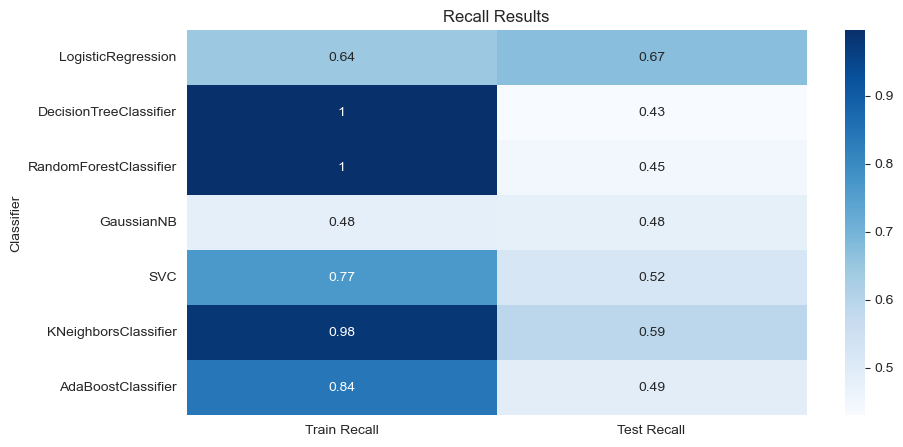

In [23]:
### Displaying the results in a heatmap

display_recall_heatmap(results_untuned)

The above models show a few things:

- The Gaussian Naive Bayes model is the worst performing model, with a recall of .39 and .38 for the train and test sets respectively
<br>
</br>
- The the decision tree and the random forest models are very overfit, which is not surprising given the hyperparameters have not been tuned
<br>
</br>
- The all models but the Gaussian Naive Bayes model will move on to the next round of tuning to see if we can improve their performance on the test set


##### <ins>*Running Grid Searches Over Selected Models*</ins>

In the next round of tuning, we will run grid searches on all of the models with the exception of the Gaussian Naive Bayes model. We will pick a practical amount of hyperparameters to try and tune and run a grid search over them. Again, since recall is our key metric, we will use the recall metric as the scoring function for the grid search

In [24]:
### Running a grid search to find the best parameters for the best performing classifiers for the Logistic Regression, AdaBoost, and KNN classifiers

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [25]:
# ### Writing a gridsearch for the Logistic Regression classifier, optimizing for recall

# logreg_params = {'penalty': ['l1', 'l2', 'elasticnet'],
#                     'solver': ['saga'],
#                     'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
#                     'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}
# logreg_gridsearch = GridSearchCV(LogisticRegression(max_iter=10000), logreg_params, cv=5, scoring='recall', n_jobs=-1)
# logreg_gridsearch.fit(X_train_processed, y_train_processed)
# logreg_best_params = logreg_gridsearch.best_params_
# print('Best Parameters for Logistic Regression: {}'.format(logreg_best_params))

# ## Best Parameters for Logistic Regression: {'C': 1e-05, 'l1_ratio': 0.9, 'penalty': 'elasticnet', 'solver': 'saga'}

In [26]:
### Writing a grid search for the Decision Tree, optimizing for recall

# dtree_params = {'criterion': ['gini', 'entropy'],
#                 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 200, 500],
#                 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
# dtree_gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=312), dtree_params, cv=5, scoring='recall', n_jobs=-1)
# dtree_gridsearch.fit(X_train_processed, y_train_processed)
# dtree_best_params = dtree_gridsearch.best_params_
# print('Best Parameters for Decision Tree: {}'.format(dtree_best_params))

## Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 40, 'min_samples_split': 2}

In [27]:
### Writing a grid search for the Random Forest, optimizing for recall

# rfc = RandomForestClassifier()
# rfc_params = {'n_estimators': [100, 300, 400],
#                 'max_features': ['sqrt', 'log2'],
#                 'max_depth': [5, 10, 20, 40, 100, 300]}
# rfc_grid = GridSearchCV(rfc, rfc_params, cv=5, scoring='recall')
# rfc_grid.fit(X_train_processed, y_train_processed)
# print('Best Parameters for Random Forest: {}'.format(rfc_grid.best_params_))

## Best Parameters for Random Forest: {'max_depth': 40, 'max_features': 'log2', 'n_estimators': 400}

In [28]:
# # Writing a grid search for the KNN classifier, optimizing for recall

# knn = KNeighborsClassifier()
# knn_params = {'n_neighbors': [3, 5, 7, 9, 11],
#                 'weights': ['uniform', 'distance']}
# knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='recall')
# knn_grid.fit(X_train_processed, y_train_processed)
# print('Best Parameters for KNN: {}'.format(knn_grid.best_params_))

# # Best Parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}

In [29]:
# ## Writing a grid search for the AdaBoost classifier, optimizing for recall

# abc = AdaBoostClassifier()
# abc_params = {'n_estimators': [100, 200, 300, 500, 600, 700],
#                 'learning_rate': [0.1, 1.0, 10.0]}
# abc_grid = GridSearchCV(abc, abc_params, cv=5, scoring='recall')
# abc_grid.fit(X_train_processed, y_train_processed)
# print('Best Parameters for AdaBoost: {}'.format(abc_grid.best_params_))

# # Best Parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 700}

##### <ins>*Applying ideal hyper parameters and comparing results*</ins>

With ideal hyper parameters obtained from our grid search, we will recreate our list of estimators and evaluate the improvement between the default parameters and the tuned parameters

In [30]:
### Remaking the selected estimators with the above "best" paramters to optimize for recall in one list

classifiers_tuned = [
    LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.9, C=0.0001, random_state=312),
    DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_split=2, random_state=312),
    RandomForestClassifier(n_estimators=500, max_features='log2', max_depth=400, random_state=312),
    KNeighborsClassifier(n_neighbors=3, weights='distance'),
    AdaBoostClassifier(n_estimators=700, learning_rate=1.0, random_state=312)]

### Evaluating the classifiers using the evaluate_classifiers function

results_tuned = evaluate_classifiers(classifiers_tuned, X_train_processed, X_test_processed, y_train_processed, y_test_processed)

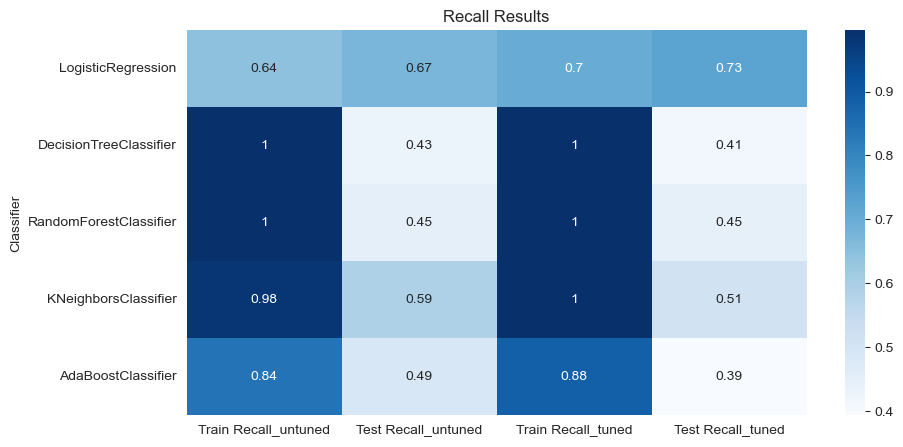

In [31]:
### Merging the results of the untuned and tuned classifiers into one dataframe

results = pd.merge(results_untuned, results_tuned, on='Classifier', suffixes=('_untuned', '_tuned'))

### Displaying the results in a heatmap

display_recall_heatmap(results)

##### <ins>*Conclusion: Hyperparameter Tuning*</ins>

As you can see, the hyperparameter tuning only seemed to improve performance on the logsitic regression model. This is not surprising given the small amount of data we have to work with. In practice, we would want to have a larger dataset to work with to be able to tune the hyperparameters more effectively.

With the results above, we see that the logistic regression model is the best performing model after hyperparameter tuning. We will use this model for our application

<a id='appendix-PCA'></a>

## **Appendix: Attempting PCA on Overfit Models**

While not a direct way to address overfitting, we can attempt to reduce the dimensionality of the data to see if we can improve the performance of the models on the test set. We will attempt to reduce the dimensionality of the data using PCA and see if we can improve the performance.

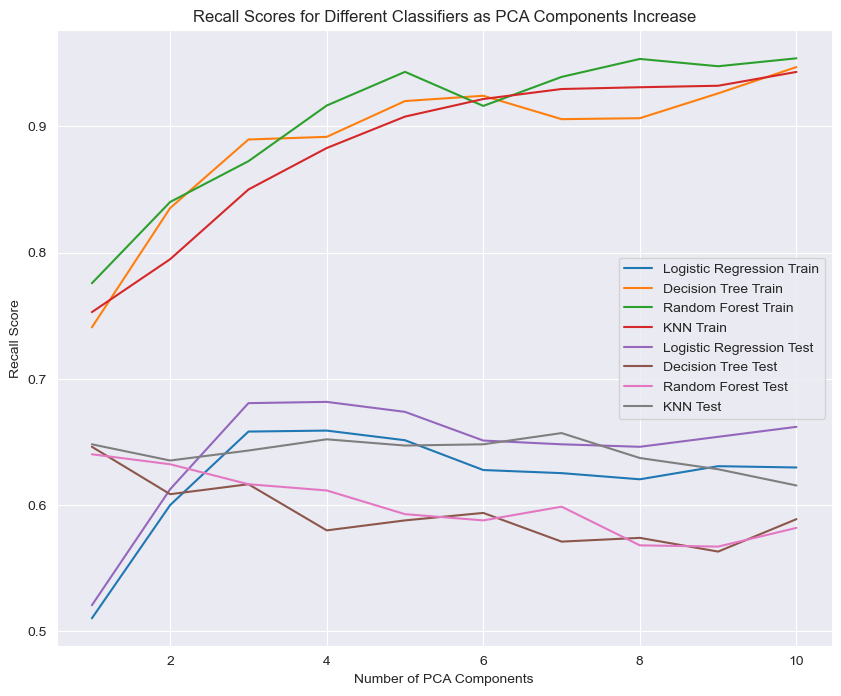

Maximum Train Recall Score: 0.9539575949760617
Maximum Test Recall Score: 0.6818181818181818


In [32]:
### Making a list of test recall scores for the decision tree, random forest, logistic regression, and KNN classifiers as the PCA data numbers increase

from sklearn.decomposition import PCA

train_recall_pca = []
test_recall_pca = []

for i in range(1, 11):
    pca = PCA(n_components=i)
    X_train_pca_processed = pca.fit_transform(X_train_processed)
    X_test_pca_processed = pca.transform(X_test_processed)
    classifiers_pca = [
        LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.9, C=0.1, random_state=312),
        DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=2, random_state=312),
        RandomForestClassifier(n_estimators=15, max_features='sqrt', max_depth=20, random_state=312),
        KNeighborsClassifier(n_neighbors=5, weights='uniform')]
    results_pca = evaluate_classifiers(classifiers_pca, X_train_pca_processed, X_test_pca_processed, y_train_processed, y_test_processed)
    train_recall_pca.append(results_pca['Train Recall'].values)
    test_recall_pca.append(results_pca['Test Recall'].values)

### Plotting the train and test recall scores for the decision tree, random forest, and KNN classifiers as the PCA data numbers increase. Label each line with the respective classifier name and if it relates to that model's training or test data.

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), [i[0] for i in train_recall_pca], label='Logistic Regression Train')
plt.plot(range(1, 11), [i[1] for i in train_recall_pca], label='Decision Tree Train')
plt.plot(range(1, 11), [i[2] for i in train_recall_pca], label='Random Forest Train')
plt.plot(range(1, 11), [i[3] for i in train_recall_pca], label='KNN Train')
plt.plot(range(1, 11), [i[0] for i in test_recall_pca], label='Logistic Regression Test')
plt.plot(range(1, 11), [i[1] for i in test_recall_pca], label='Decision Tree Test')
plt.plot(range(1, 11), [i[2] for i in test_recall_pca], label='Random Forest Test')
plt.plot(range(1, 11), [i[3] for i in test_recall_pca], label='KNN Test')
plt.xlabel('Number of PCA Components')
plt.ylabel('Recall Score')
plt.title('Recall Scores for Different Classifiers as PCA Components Increase')
plt.legend()
plt.show()

### Printing where the train and test recall scores for the decision tree, random forest, and KNN classifiers are at their maximum

print('Maximum Train Recall Score: {}'.format(max([max(i) for i in train_recall_pca])))
print('Maximum Test Recall Score: {}'.format(max([max(i) for i in test_recall_pca])))

##### <ins>*Conclusion: PCA*</ins>

While PCA improved the performance on the test set of the decision tree, random forest, and KNN models, it did not improve the performance of the logistic regressor. Since the logisitic regression model is a simpler model, we will choose to use the logistic regression model as our final model as it is more practical to implement in a production environment